Importting python libraries of numpy, pandas, sklearn and pytorch for dataset loading and methods

In [ ]:
import torch
import torch.nn as nn
import torch.nn. functional as F
# to load all neural net functionality # adds some efficiency
from torch.utils.data import DataLoader # Lets us Load data in batches from torchvision import datasets, transforms
from torchvision import datasets, transforms
import sklearn
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix # for evaluating results
import matplotlib.pyplot as plt
%matplotlib inline
import time
torch.manual_seed (101) # for consistent results

Importting MNIST dataset and transaforming it into tensors

In [ ]:
#trainning data
Transform = transforms.ToTensor()
train = datasets.MNIST(root = '/content/DATA', train = True, download = True, transform = Transform)
train

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 17964857.86it/s]


Extracting /content/DATA/MNIST/raw/train-images-idx3-ubyte.gz to /content/DATA/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 486719.38it/s]


Extracting /content/DATA/MNIST/raw/train-labels-idx1-ubyte.gz to /content/DATA/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4462709.01it/s]


Extracting /content/DATA/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/DATA/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 4088096.30it/s]

Extracting /content/DATA/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/DATA/MNIST/raw



Dataset MNIST
    Number of datapoints: 60000
    Root location: /content/DATA
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
#test data
test = datasets.MNIST(root = '/content/DATA', train = False, download = True, transform = Transform)
test

Dataset MNIST
    Number of datapoints: 10000
    Root location: /content/DATA
    Split: Test
    StandardTransform
Transform: ToTensor()

Display of the MNIST images

In [ ]:
sample = 1
image, label = train[sample]
print (image.shape,label)

torch.Size([1, 28, 28]) 0


In [ ]:
def show_mnist_images(images, labels, num_images=16):
    num_rows = int(num_images**0.5)
    num_cols = int(num_images**0.5)

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))
    fig.subplots_adjust(hspace=0.5)

    for i in range(num_images):
        row = i // num_cols
        col = i % num_cols
        ax = axes[row, col]
        ax.imshow(images[i].numpy().squeeze(), cmap='gray')
        ax.set_title(f'Label: {labels[i]}')
        ax.axis('off')

    plt.show()

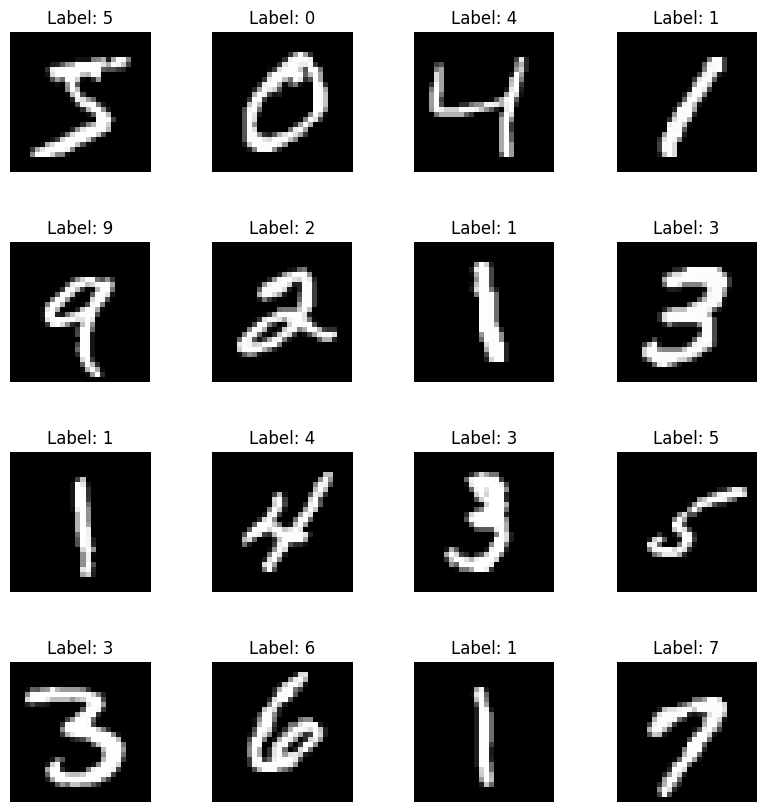

In [ ]:
images, labels = zip(*[(train[i][0], train[i][1]) for i in range(16)])
show_mnist_images(images, labels)

Loading Trainning and Test dataset

In [ ]:
train_loader = DataLoader(train, batch_size=100, shuffle=True)
test_loader = DataLoader(test, batch_size=500, shuffle=False)

Creating Basic arhtitecture of Multilayer Perceptron. There 3 layers of neurons (i.e. nodes) which are :-
1.   Input Layer
2.   Hidden Layer
3.   Output Layer


In [ ]:
class MultiLayerPerceptron(nn.Module):
  def __init__(self, input_size=784, output_size=10, layers=[120,84]):
    super().__init__()
    self.d1 = nn.Linear(input_size, layers[0])
    self.d2 = nn.Linear(layers[0], layers[1])
    self.d3 = nn.Linear(layers[1], output_size)

  def forward(self, x):
    x = F.relu(self.d1(x))
    x = F.relu(self.d2(x))
    x = self.d3(x)
    return F.log_softmax(x, dim=1)

In [ ]:
model = MultiLayerPerceptron()
print(model)

MultiLayerPerceptron(
  (d1): Linear(in_features=784, out_features=120, bias=True)
  (d2): Linear(in_features=120, out_features=84, bias=True)
  (d3): Linear(in_features=84, out_features=10, bias=True)
)


Initializing loss function and optimizer

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
for images, labels in train_loader:
  print('Initial Batch shape:', images.size())
  break
print('Batch shape after flattening', images.view(100,-1).size())

Initial Batch shape: torch.Size([100, 1, 28, 28])
Batch shape after flattening torch.Size([100, 784])


MLP model is trained and tested for each epoch. In each epoch different batch of input data is given.

In [ ]:
import torch
epochs =10
train_losses = []
train_correct = []
test_losses = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0

#Trainning Phase
    model.train()
    for b, (X_train, y_train) in enumerate(train_loader):
        y_pred = model(X_train.view(X_train.size(0), -1))
        loss = criterion(y_pred, y_train)

        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum().item()
        trn_corr += batch_corr

        optimizer.zero_grad()
        loss.backward() #Back propagation
        optimizer.step()

    train_losses.append(loss.item())
    train_accuracy = (trn_corr / len(train_loader.dataset)) * 100
    train_correct.append(train_accuracy)  # Store accuracy directly as percentage

#Testing Phase
    model.eval()
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):
            y_val = model(X_test.view(X_test.size(0), -1))

            predicted = torch.max(y_val.data, 1)[1]
            tst_corr += (predicted == y_test).sum().item()

            loss = criterion(y_val, y_test)

    test_losses.append(loss.item())
    test_accuracy = (tst_corr / len(test_loader.dataset)) * 100
    test_correct.append(test_accuracy)  # Store accuracy directly as percentage

#display
    print(f'Epoch: {i+1:2} Training Loss: {train_losses[-1]:.4f} Training Accuracy: {train_accuracy:.2f}% Test Loss: {test_losses[-1]:.4f} Test Accuracy: {test_accuracy:.2f}%')


Epoch:  1 Training Loss: 0.1815 Training Accuracy: 89.32% Test Loss: 0.2677 Test Accuracy: 94.53%
Epoch:  2 Training Loss: 0.1428 Training Accuracy: 95.25% Test Loss: 0.2068 Test Accuracy: 96.04%
Epoch:  3 Training Loss: 0.1084 Training Accuracy: 96.58% Test Loss: 0.1771 Test Accuracy: 96.57%
Epoch:  4 Training Loss: 0.0746 Training Accuracy: 97.41% Test Loss: 0.1640 Test Accuracy: 97.23%
Epoch:  5 Training Loss: 0.1012 Training Accuracy: 97.98% Test Loss: 0.1664 Test Accuracy: 96.48%
Epoch:  6 Training Loss: 0.0323 Training Accuracy: 98.36% Test Loss: 0.1313 Test Accuracy: 97.54%
Epoch:  7 Training Loss: 0.0302 Training Accuracy: 98.66% Test Loss: 0.1589 Test Accuracy: 97.42%
Epoch:  8 Training Loss: 0.0336 Training Accuracy: 98.86% Test Loss: 0.1282 Test Accuracy: 97.57%
Epoch:  9 Training Loss: 0.0494 Training Accuracy: 99.14% Test Loss: 0.1394 Test Accuracy: 97.46%
Epoch: 10 Training Loss: 0.0210 Training Accuracy: 99.25% Test Loss: 0.1235 Test Accuracy: 97.77%


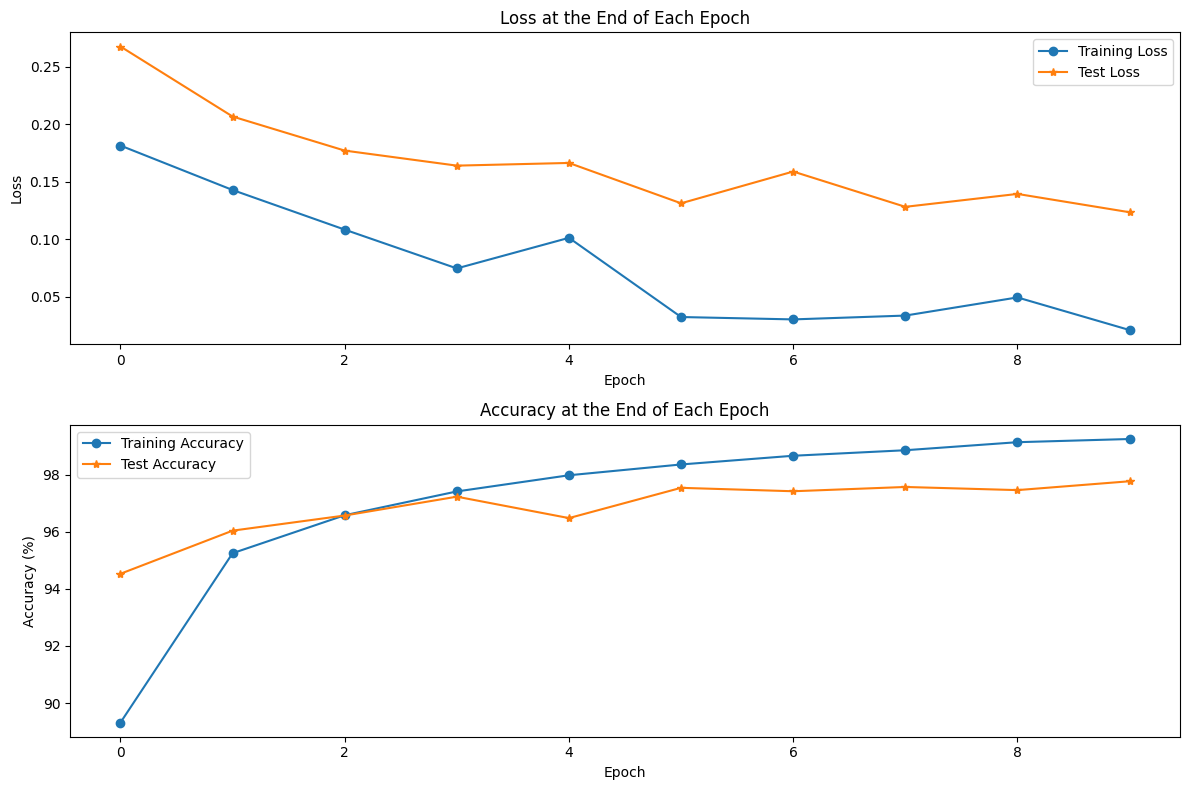

In [ ]:
import matplotlib.pyplot as plt

# Plot the losses
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(train_losses, label='Training Loss', marker = 'o')
plt.plot(test_losses, label='Test Loss', marker = '*' )
plt.title('Loss at the End of Each Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot the accuracies
plt.subplot(2, 1, 2)
plt.plot(train_correct, label='Training Accuracy', marker = 'o')
plt.plot(test_correct, label='Test Accuracy', marker = '*')
plt.title('Accuracy at the End of Each Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()
